# 案例1~4 餐饮服务行业收入表 金融行业收入表 汽车制造行业收入表 IT行业收入表

In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
# 设置字体路径
font_path = '/System/Library/Fonts/STHeiti Medium.ttc'

# 加载字体
my_font = font_manager.FontProperties(fname=font_path)

# 设置为默认字体
plt.rcParams['font.family'] = my_font.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 数据预处理

In [94]:
df = pd.read_excel('餐饮服务行业收入表.xlsx')
# df = pd.read_excel('金融行业收入表.xlsx')
# df = pd.read_excel('汽车制造行业收入表.xlsx')
# df = pd.read_excel('IT行业收入表.xlsx')

In [75]:
df.head()

,工龄,薪水
0,0.0,10808
1,0.1,13611
2,0.2,12306
3,0.3,12151
4,0.3,13057


In [76]:
df.isnull().sum()


工龄    0
薪水    0
dtype: int64

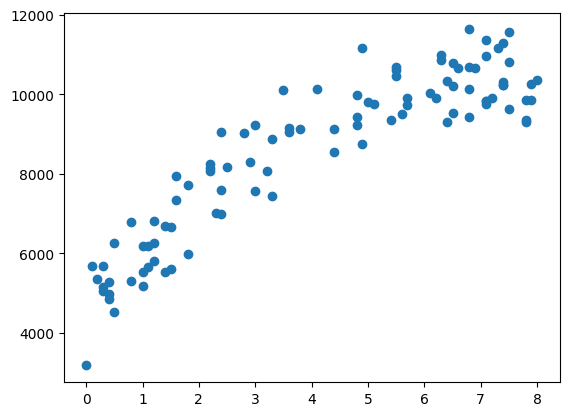

In [95]:
plt.scatter(df['工龄'], df['薪水'])
plt.show()

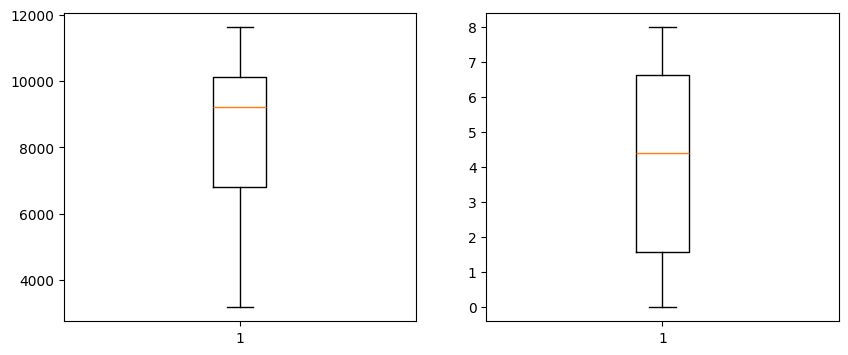

In [96]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.boxplot(df['薪水'])

plt.subplot(1,2,2)
plt.boxplot(df['工龄'])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## 线性回归

In [79]:
x_train, x_test, y_train, y_test = train_test_split(df[['工龄']], df['薪水'], test_size=0.2, random_state=42)

In [80]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [81]:
print('mse:', mean_squared_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))


mse: 4855442.658615259
r2: 0.8815705091563912


## 随机森林

In [82]:
rm = RandomForestRegressor()
rm.fit(x_train, y_train)
y_pred = rm.predict(x_test)

In [83]:
print('mse:', mean_squared_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))

mse: 2389839.0208794717
r2: 0.9417092449977235


## XGBoost

In [84]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("r2:", r2_score(y_test, y_pred_xgb))

MSE: 3569750.747018099
r2: 0.9129299235657095


## LGBMRegressor

In [85]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(random_state=42)
lgb.fit(x_train, y_train)
y_pred_lgb = lgb.predict(x_test)

print("MSE:", mean_squared_error(y_test, y_pred_lgb))
print("r2:", r2_score(y_test, y_pred_lgb))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 1
[LightGBM] [Info] Start training from score 20822.600000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

## SVM

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

In [86]:
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf', C=100, gamma='scale'))
])

svr_pipeline.fit(x_train, y_train)
y_pred = svr_pipeline.predict(x_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("r2:", r2_score(y_test, y_pred))

MSE: 19519338.352298636
r2: 0.5239022546038833


In [87]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'svr__C': [0.1, 1, 10, 100, 1000],
    'svr__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'svr__kernel': ['rbf', 'poly', 'linear']
}

grid = GridSearchCV(svr_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train, y_train)

print("最佳参数:", grid.best_params_)
print("最佳交叉验证r2:", grid.best_score_)

y_pred = grid.predict(x_test)

最佳参数: {'svr__C': 1000, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
最佳交叉验证r2: 0.8533151968605445


# 案例5 客户价值数据表

In [4]:
df = pd.read_excel('客户价值数据表.xlsx')

## 查看数据

在这个数据中 客户价值是我们要预测的目标

In [5]:
df.head()

,客户价值,历史贷款金额,贷款次数,学历,月收入,性别
0,1150,6488,2,2,9567,1
1,1157,5194,4,2,10767,0
2,1163,7066,3,2,9317,0
3,983,3550,3,2,10517,0
4,1205,7847,3,3,11267,1


In [6]:
df.isnull().sum()

客户价值      0
历史贷款金额    0
贷款次数      0
学历        0
月收入       0
性别        0
dtype: int64

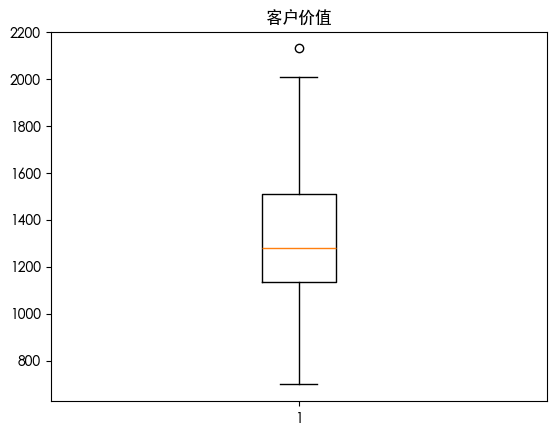

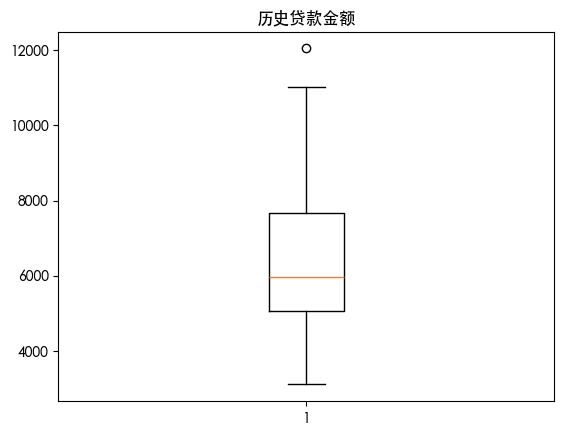

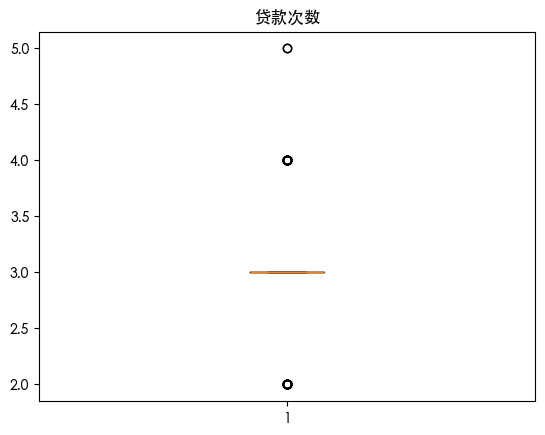

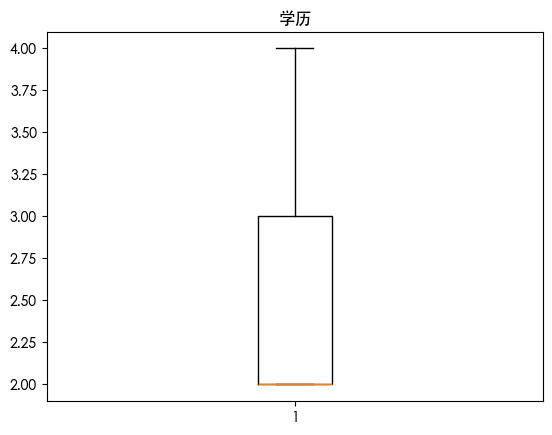

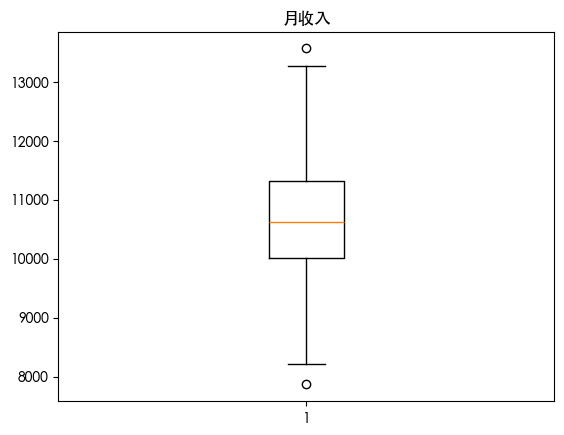

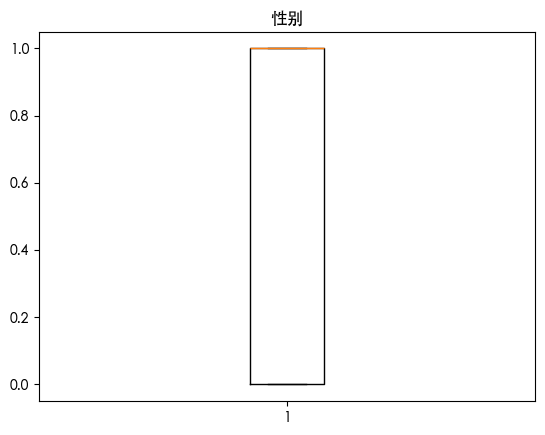

In [103]:
for column in df.columns:
    plt.boxplot(df[column])
    plt.title(column)
    plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
X = df.drop(columns=['客户价值'])
Y = df['客户价值']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 多元线性回归

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print('mse:', mean_squared_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))

mse: 24535.02941821733
r2: 0.5802551330031818


In [11]:
lr.coef_

array([5.99175873e-02, 1.01030266e+02, 1.19661451e+02, 5.92067892e-02,
       1.41533251e+01])

In [12]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2).fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   客户价值   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     32.44
Date:                Fri, 19 Sep 2025   Prob (F-statistic):           6.41e-21
Time:                        09:57:49   Log-Likelihood:                -843.50
No. Observations:                 128   AIC:                             1699.
Df Residuals:                     122   BIC:                             1716.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -208.4200    163.810     -1.272      0.206    -532.699     115.859
历史贷款金额         0.0571      0.010      5.945      0.000       0.038       0.076
贷款次数          96.1723     25.962      3.704      0.000      44.778     147.567
学历           113.4520     37.909      2.993      0.003      38.406     188.498
月收入            0.0561      0.019      2.941      0.004       0.018       0.094
性别             1.9787     32.286      0.061      0.951     -61.934      65.891
==============================================================================
Omnibus:                        1.597   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.450   Jarque-Bera (JB):                1.538
Skew:                           0.264   Prob(JB):                        0.464
Kurtosis:                       2.900   Cond. No.                     1.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 随机森林

In [13]:
from sklearn.ensemble import RandomForestRegressor

rm = RandomForestRegressor()
rm.fit(x_train, y_train)
y_pred = rm.predict(x_test)

print('mse:', mean_squared_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))

mse: 18652.006080769228
r2: 0.6809017964419799


In [14]:
feature_importance = pd.DataFrame({
    "feature": x_train.columns,
    "importance": rm.feature_importances_
}).sort_values(by="importance", ascending=False)
print(feature_importance)

  feature  importance
0  历史贷款金额    0.404590
3     月收入    0.362695
1    贷款次数    0.130046
2      学历    0.073263
4      性别    0.029405


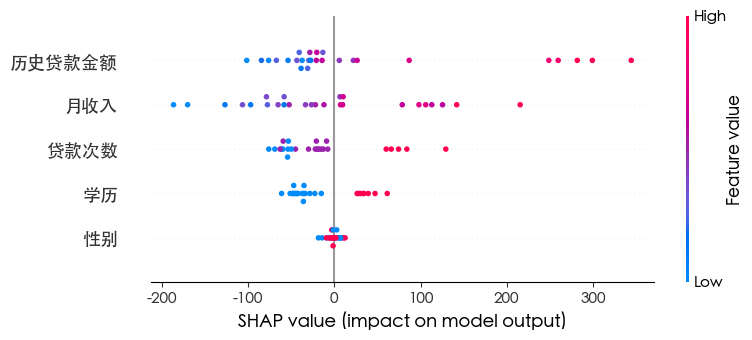

In [ ]:
import shap

explainer = shap.TreeExplainer(rm)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test)

# XGBoost

In [22]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("r2:", r2_score(y_test, y_pred))

MSE: 32402.514511845002
r2: 0.4456583315103658


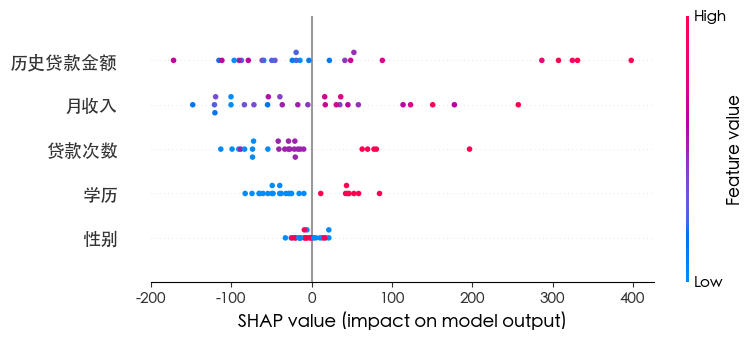

In [17]:
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test)

# KNN

In [34]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("r2:", r2_score(y_test, y_pred))

MSE: 20527.141826923078
r2: 0.6488220059125291


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


  0%|          | 0/26 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:465: UserW

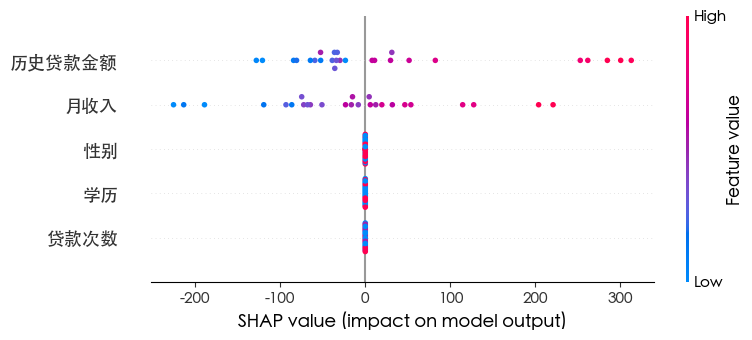

In [ ]:
import shap
import numpy as np

# 预测函数
f = lambda X: knn.predict(X)

# 选取一部分训练数据作为背景数据
background = x_train.sample(50, random_state=42)

explainer = shap.KernelExplainer(f, background)

shap_values = explainer.shap_values(x_test[:50])  

shap.summary_plot(shap_values, x_test[:50])

# SVM

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

In [9]:
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf', C=100, gamma='scale'))
])

svr_pipeline.fit(x_train, y_train)
y_pred = svr_pipeline.predict(x_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("r2:", r2_score(y_test, y_pred))

MSE: 26681.700620075168
r2: 0.5435299185047356


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


  0%|          | 0/26 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have v

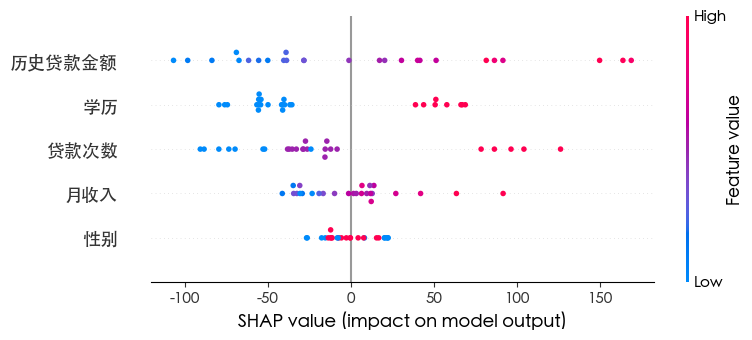

In [11]:
import shap
import numpy as np

# 预测函数
f = lambda X: svr_pipeline.predict(X)

# 选取一部分训练数据作为背景数据
background = x_train.sample(50, random_state=42)

explainer = shap.KernelExplainer(f, background)

shap_values = explainer.shap_values(x_test[:50])  

shap.summary_plot(shap_values, x_test[:50])